# Shap Values
## Final de Aprendizaje Supervisado
## 2021 S2

* Profesores: Pablo Vena, Martín Savransky
* Alumnos: Alejandro Fleitas, Federico Ferrigno


# Indice

Teoría Básica
   * Trade off sesgo varianza
   * Motivación y ejemplo
   * Un poco de formalidad y algo de formuleo
    

Aplicaciones
  * Ejemplo regresion logistica
  * Ejemplo random forest
  
Material consultado

### Trade off sesgo varianza

A medida que los modelos estadísticos crecen en complejidad (el cúal muchas veces es complicado tambien definir que es mas complejo) a menudo crece la capacidad predictiva, es decir, baja el sesgo, pero esto necesariamente viene acompañado de un aumento de la varianza. Esto podiamos verlo a menudo en las regresiones lineales múltiples, a medida que agregabamos variables o bien inlcuiamos interacciones, la capacidad predictiva aumentaba o bien el $R^2$ en el conjunto de testing crecía.

Con el desarrollo de los modelos de machine learning que son aun mas complejos, se gana mas capacidad predictiva pero se gana mas varianza, como se puede observar en la imagen

<img src="sesgo_varianza.jpg" width="800" height="400">


### Motivación y ejemplos

#### Competencia en grupo!


Un grupo de amigos se encuentra en una competencia de programación el cual tiene un premio al ganador de $10000. Llamemos a estos jugadores A,B,C y D. A su vez supongamos que consiguieron el primer puesto. La pregunta a responder es, cúal es la forma justa de repartir el premio? Podría ser bastante injusto repartir en partes iguales, ya que suponemos que todos tuvieron igual rendimiento. 

Una forma un poco mas justo es la siguiente, saquemos un jugador y veamos en que posición quedan compitiendo únicamente 3 jugadores. Imaginemos que quitamos al jugador D y el premio alcanzado es de $$6000. 
Sería justo decir que entonces el valor que aporta el jugador D es de $ 4000? Si hicieramos esto, entonces uno estaría suponiendo que los jugadores entre sí juegan en forma incorrelacionada, es decir, que el rendimiento de D no depende para nada de las interacciones con sus compañeros, esto no es cierto. 

Qué podriamos hacer? 

La idea entonces es ver que pasa entre los aportes de el jugador D pero teniendo en cuenta las interacciones entre subgrupos. Esquematicamente tendriamos que armar una matriz de pagos de la siguiente forma

| Grupo | Pago |
| :- | :- |
| {A,D} | P1 |
| {B,D} | P2 |
| {C,D} | P3 |
| {A,B,D} | P4 |
| {A,C,D} | P5 |




Luego podemos calcular la contribución marginal como el promedio de todos los pagos

$ CM = \frac{\sum_{i=1}^{M} P_i}{M}$


### Un poco de formalidad

#### Shapley values como aplicado en IA!

Usando como pivote el ejemplo anterior, podemos imaginarnos que el premio que se va a repartir al ganador es una nuestra variable a predecir, es decir $ E(Y/X=x) $ entonces el valor del premio será $ \hat{E}(Y/X=x) $ los jugadores serán nuestras variables predictoras 

Para entrar en calor con Shapley values y el modelado estadístico, pensemos como podriamos intentar hacer el calculo de la contribución marginal de cada predictor en una regresión lineal, es decir, nuestro modelo será

$ \hat{f}(x) = \beta_0+\beta_1~X_1+\beta_2~X_2+......\beta_p~X_p $

Entonces la constribución j-ésima de la variable j la llamamos $\phi_j(\hat{f}) = \beta_j~x_j~-~E(\beta_jX_j) = \beta_j~x_j~-~\beta_jE(X_j)$

Lo que se puede ver es que la contribución marginal es la diferencia entre el efecto propio de la variable y el efecto promedio. Ahora si sumamos todas las contribuciones tenemos

$\sum_{j=1}^{p}\phi_j(\hat{f}) = \sum_{j=1}^{p}~(\beta_j~x_j~-~E(\beta_jX_j)) $

$= (~\beta_0~+\sum_{j=1}^{p}~\beta_j~x_j~)~-~(\beta_0~+\sum_{j=1}^{p}~E(\beta_j~x_j)~)$


$=~ \hat{f}(x)~-~E(\hat{f}(X))$

Entonces, como era de esperar en un modelo lineal, la suma de las contribuciones marginales, no es mas que la diferencia entre la predicción y su valor esperado. Ahora bien, esto es agnóstico al modelo? La respuesta es no, es decir, no existe una fórmula mágica que aplique a cualquier relacion entre los predictores y la variable a predecir.

#### El valor Shapley

El valor de shapley quedara determinado por todas las combinaciones de cada variable ponderado por el total de combinaciones, siendo S el subconjunto de todas las combinaciones de las variables usadas en el modelo, el valor queda determinado por

$\phi_j(val)~=~\sum_{S~\subseteq {(1,...p)} ~/~ {j}}~~\frac{|S|!~(p-|S|-1)!}{p!}~(val(S\cup{j})~-~val(S))$

Donde $ Val(S) $ es la contribucion marginal de un determinado subgrupo, es decir

$ val(S)~=~ \int~\hat{f}~(x_1,....x_p)~d\mathbb{P_{x\notin S}}~~-~~E_X(\hat{f}(X))                  $

Donde la integral respresenta un valor promedio dentro de las interacciones usando integrales de riemann stieltjes. 

Para ser más claros, supongamos que tenemos un modelo que tiene 4 variables $ \{x_1,x_2,x_3,x_4\} $ y nos interesa saber cual es el valor de $val(S)$ evaluado en un subgrupo de solo dos características $\{x_1,x_3\}$, la expresión será:

$ val(S)~=~ \int\int~\hat{f}~(x_1,X_2,x_3,X_4)~d\mathbb{P_{X_1~X_4}}~~-~~E_X(\hat{f}(X))$

Que si miramos bien es similar a la contribución marginal del modelo lineal.

Existen limitaciones a nivel cómputo ya que a medida que agregamos variables la cantidad de subgrupos se hacen dificiles de manejar (tienen magnitudes de $2^{M}$)

#### Estimación del valor de Shapley usando montecarlo

La idea es simple, realizar una aproximación del valor de shapley usando muestreo en las observaciones y en la cantidad de variables Xs, con la idea de hacer posible el cómputo del valor, a continuación dejamos el pseudo código que se lo puede encontrar en https://christophm.github.io/interpretable-ml-book/shapley.html

<img src="montecarlo.png" width="800" height="400">


#### Shap values (SHapley Additive exPlanations)

El método de shap comibna la idea que utiliza LIME (Local interpretable model-agnostic explanations) y los shapley values. La idea es poder construir un modelo aditivo el cual como coeficientes contenga a los valores de shapley. Entonces, para un valor de $x$ dado de un feature se tiene

$g(z')~=~\phi_0+\sum_{j=1}^{M}\phi_jz'_j~~~~(1)$

Donde $z'\in\{0,1\}^{M}$ se lo llama vector de colación. Si dentro del vector $z$ se encuentra un $1$ quiere decir que la variable $X$ se encuentra dentro del vector de coalición. A modo de ejemplo para entender como funciona Z, imaginemos que estamos calculando la contribucion marginal de $x_1$ en un total de variables $\{x_1,x_2,x_3\}$, entonces

$z'(\{x_1,x_2\},\{x_2,x_3\},\{x_1,x_3\}) = (1,0,1)$

#### Kernel shap



Entonces si podemos estimar los coeficientes del modelo presentado previamente, tendriamos resuelto el problema de encontrar el valor de los $\phi_j$. Entonces el método es bastante simple y es el siguiente:

* Tomo una muestra de las colaciones $z_k'\in\{0,1\}^{M}$



* Calculo el valor de la predicción de la coalición pero primero por supuesto transformando la coalición binaria en el verdadero valor del feature $X$


* Calculo los coeficientes del modelo lineal $(1)$ teniendo en cuenta el kernel.


Excelente, pero aun no dijimos nada sobre el kernel. Donde aparece? va a aparecer en la función de perdida dentro del método de estimación de coeficientes que utilizamos en el modelo aditivo.

Ahora bien, hay algo que no dijimos y no es detalle menor, que pasaría con los $Xs$ que no aparecen en la colación? es decir, pasar de $Z$ a $X$ es intuitivo siempre y cuando las $Xs$ aparezcan en las colaciones (en un vector exclusivamente de $1s$ la transformación es biunívoca), pero que ocurre si esto no pasa? (recordemos que el modelo fue entrenado con $p$ predictores, para tener una estimación es necesario tener valores en cada observación de esos $p$ predictores)

El kernel lo soluciona fácil, toma valores de la variable en forma aleatoria, esta imagen me parece bastante ilutrativa

<img src="kernels.png" width="800" height="400">


El kernel propuesto es 

$ \pi_x(z')=~\frac {M-1}{\binom{M}{|z'|}~|z'|~(M-|z'|)}$

Este kernel fue construido con la idea de poder ponderar con la siguiente lógica: las coaliciones pequeñas (pocos 1) y las coaliciones grandes (muchos 1) obtienen los mayores pesos. La intuición detrás de esto es: Aprendemos más sobre las características individuales si podemos estudiar sus efectos de forma aislada

Finalmente el problema de estimación de coeficientes (modelo $(1)$), tendrá la siguiente función de perdida

$L(\hat{f},g,\pi_x)~=~\sum_{(z'\in Z)}~[\hat{f}(h_x(z'))-g(z')]^2~\pi_x(z')$

Vale la pena aclarar que existen muchos kernels, recomendandos de acuerdo al modelo original el cual uno entrenó. Un kernel muy popular por su velocidad de cómputo es el TreeShap.

Para más sobre kernels se puede ver la documentacion oficial https://shap.readthedocs.io/en/latest/api.html

#### Un poco de codigo

In [1]:
import pandas as pd
import numpy as np

In [2]:
from collections import Counter
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv(r"C:\Users\Dell7400\Documents\Ale\Facu\Aprendizaje_Supervisado\Data\Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
class __init__(self):
    

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_37804/3580951617.py, line 2)

In [5]:
# transformo a minuscula todas las columnas
df.columns = map(str.lower, df.columns)

In [6]:
df.drop(columns=["rownumber","customerid","surname"],inplace=True)

In [7]:
# one hot enconder
for x in df.dtypes.reset_index()[df.dtypes.reset_index()[0]=="object"]["index"].to_list():
    one_hot = pd.get_dummies(df[x])
    # Drop column as it is now encoded
    df = df.drop(x,axis = 1)
    # Join the encoded df
    df = df.join(one_hot)
    
    

In [8]:
df.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [9]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(["exited"],axis=1),df["exited"],test_size=0.3,random_state=1234)

In [10]:
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier()

C:\Users\Dell7400\Anaconda3\envs\dev\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Random Forest')

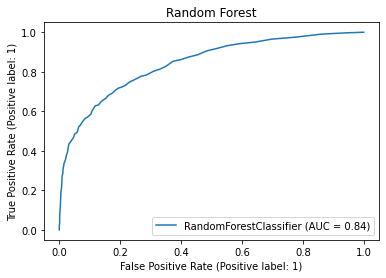

In [11]:
from sklearn import metrics
metrics.plot_roc_curve(clf, x_test, y_test)
plt.title("Random Forest")


In [12]:
from sklearn.linear_model import LogisticRegression
clf_log = LogisticRegression(random_state=0).fit(x_train, y_train)

C:\Users\Dell7400\Anaconda3\envs\dev\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Regresion Logistica')

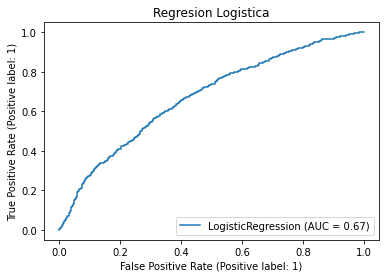

In [13]:
metrics.plot_roc_curve(clf_log, x_test, y_test)
plt.title("Regresion Logistica")

### Shap Values

#### * KernelExplainer

In [14]:
import shap

In [19]:
df.exited.mean()

0.2037

In [20]:
x_test["proba"] = clf.predict_proba(x_test)[:,1]
x_train["proba"] = clf.predict_proba(x_train)[:,1]

In [21]:
start_index = 1
end_index = 5
x_test[start_index:end_index]

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,France,Germany,Spain,Female,Male,proba
1784,658,36,8,174060.46,1,1,1,94925.62,1,0,0,0,1,0.03
6301,766,45,6,97652.96,1,1,0,127332.33,0,1,0,1,0,0.80
1600,517,28,2,115062.61,1,1,0,179056.23,1,0,0,0,1,0.06
7920,714,34,5,141173.03,1,0,1,98896.06,1,0,0,0,1,0.04


In [64]:
#k_explainer = shap.KernelExplainer(clf.predict_proba, x_train.drop("proba",axis=1))
#k_shap_values = k_explainer.shap_values(x_train.drop("proba",axis=1)[start_index:end_index])


#### * TreeExplainer

In [15]:
explainer = shap.TreeExplainer(clf)
start_index = 5
end_index = 6

In [ ]:
x_test[start_index:end_index]

In [23]:
#shap_values = explainer.shap_values(x_test.drop("proba",axis=1)[start_index:end_index])
shap_values = explainer.shap_values(x_test[start_index:end_index])

In [24]:
explainer.expected_value[1],clf.predict_proba(x_train)[:,1].mean()


(0.2049471428571428, 0.20611142857142856)

#### Gráficos

In [25]:
shap_values

[array([[-0.03517889,  0.02714572,  0.00144425, -0.03696639,  0.05437779,
          0.0057328 , -0.0490233 ,  0.01100277, -0.00092631,  0.01407498,
         -0.00537078,  0.0111502 ,  0.0074843 ]]),
 array([[ 0.03517889, -0.02714572, -0.00144425,  0.03696639, -0.05437779,
         -0.0057328 ,  0.0490233 , -0.01100277,  0.00092631, -0.01407498,
          0.00537078, -0.0111502 , -0.0074843 ]])]

In [26]:
# %% >> Visualize local predictions
shap.initjs()
# Force plot
#prediction = clf.predict(x_test.drop("proba",axis=1)[start_index:end_index])[0]
#print(f"The RF predicted: {prediction}")

In [27]:
explainer.expected_value[1],shap_values[1]

(0.2049471428571428,
 array([[ 0.03517889, -0.02714572, -0.00144425,  0.03696639, -0.05437779,
         -0.0057328 ,  0.0490233 , -0.01100277,  0.00092631, -0.01407498,
          0.00537078, -0.0111502 , -0.0074843 ]]))

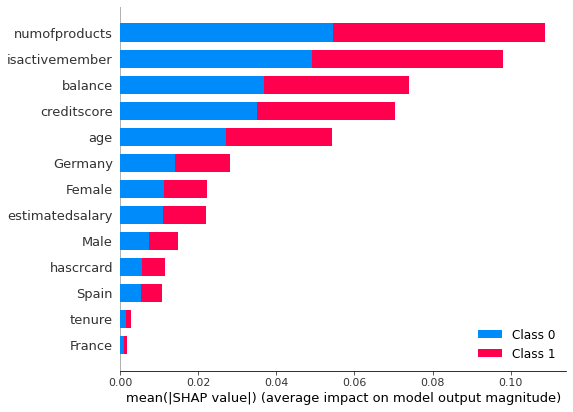

In [29]:
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                x_test[start_index:end_index])
#                x_test.drop("proba",axis=1)[start_index:end_index]) # for values

# %% >> Visualize global features
# Feature summary
shap.summary_plot(shap_values, x_test)#.drop("proba",axis=1))

            feature  importance
1               age    0.239187
0       creditscore    0.145177
7   estimatedsalary    0.143502
3           balance    0.140075
4     numofproducts    0.123054
2            tenure    0.083941
6    isactivemember    0.043117
9           Germany    0.023824
5         hascrcard    0.018584
8            France    0.010823
10            Spain    0.010005
12             Male    0.009384
11           Female    0.009328


<BarContainer object of 13 artists>

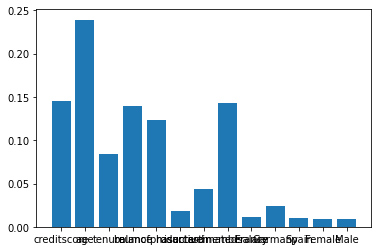

In [31]:
df_feature_importance = pd.DataFrame({"feature":x_train.columns,"importance":clf.feature_importances_})
print(df_feature_importance.sort_values(by="importance",ascending=False))
plt.bar(df_feature_importance.feature,df_feature_importance.importance)

In [54]:
from scipy.ndimage import gaussian_filter1d
import os

In [58]:
def generate_output_dependence_plot(model_object, x_train, number_of_top_variables, path, threshold_outliers, sample_size):
    explainer = shap.TreeExplainer(model_object)
    x_train = x_train[1:sample_size]
    shap_values = explainer.shap_values(x_train)
    top_inds = np.argsort(-np.sum(np.abs(np.array(shap_values[1])), 0))
    for i in np.arange(0, number_of_top_variables):
        variable_selected = x_train.columns[top_inds[i]]
        aux_index = x_train[variable_selected] < x_train[variable_selected].quantile(threshold_outliers)
       # print('Iterating SHAP values for variable {}'.format(variable_selected))
        shap.dependence_plot("rank({})".format(i),shap_values[1],x_train.values,feature_names=x_train.columns,xmin="percentile({})".format(1),xmax="percentile({})".format(100*threshold_outliers),interaction_index=None,show=False)
        plt.title("{} plot".format(variable_selected))
        plt.ylabel("Score contribution for the \n {} feature".format(variable_selected))
        aux_dt = pd.DataFrame({'variable_value':x_train[variable_selected][aux_index].values,
                               'Shap':shap_values[1][aux_index][:, np.where(np.array(x_train.columns) == variable_selected)[0][0]]})
        aux_dt.sort_values(by='variable_value', inplace=True)
        ysmoothed = gaussian_filter1d(aux_dt['Shap'], sigma=15)
        plt.plot(aux_dt['variable_value'], ysmoothed, 'g-', linewidth=4)
#        plt.scatter(aux_dt['variable_value'],shap_values[1], 'g-', linewidth=4)
#        filename = date.today().strftime("%Y%m%d") + "_SHAP_plot_{}.png".format(variable_selected)
#        plt.savefig(os.path.join(path, filename),bbox_inches ='tight')

In [59]:
model_folder = 'C:\\Users\\Dell7400\\Documents\\Ale\\Facu\\Aprendizaje_Supervisado\\PythonScripts'

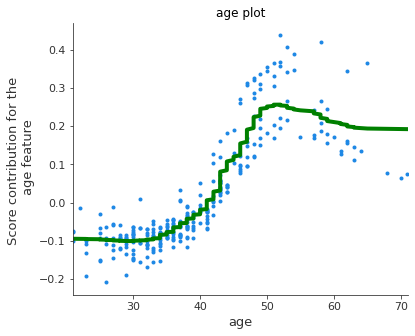

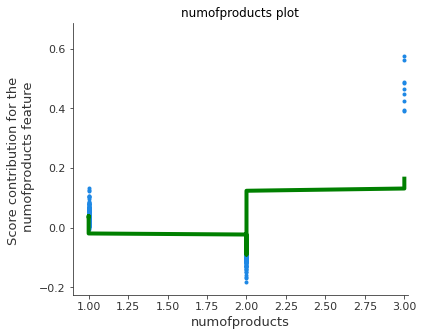

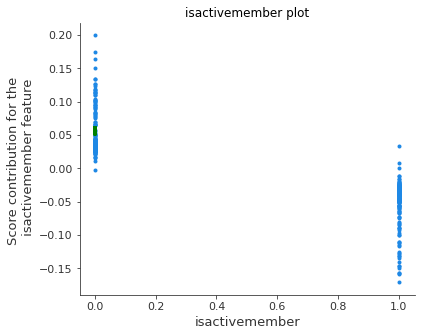

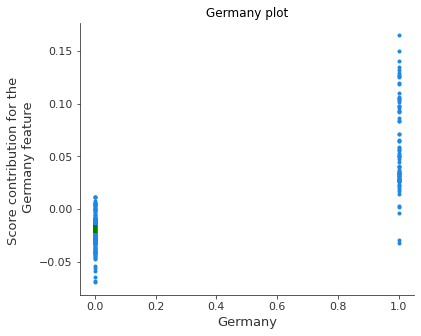

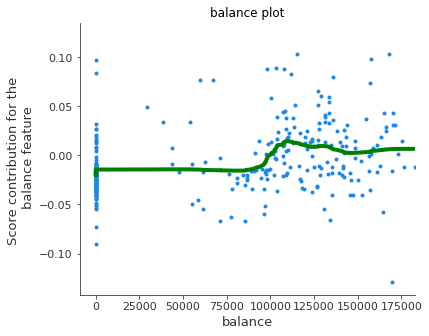

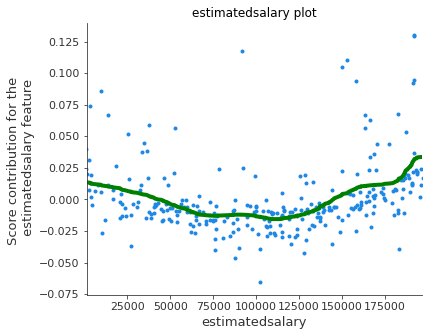

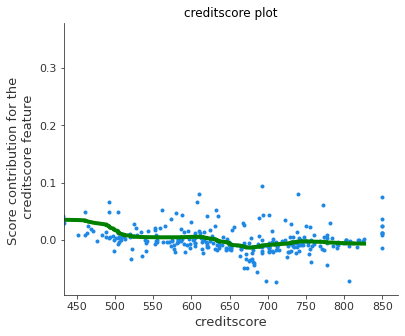

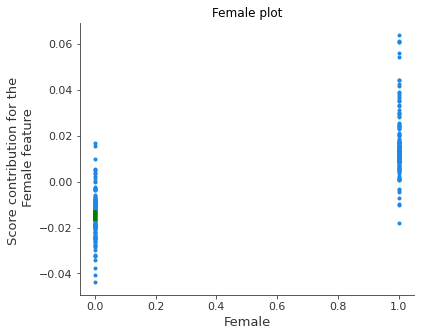

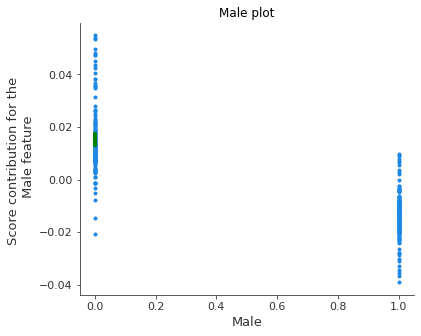

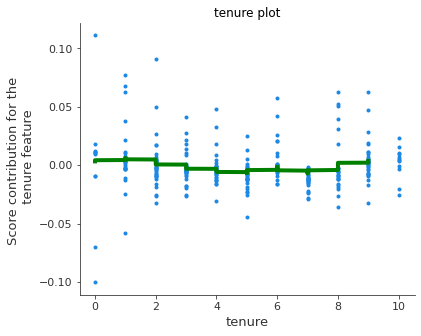

In [63]:
generate_output_dependence_plot(model_object=clf, 
                                x_train=x_train[df_feature_importance.feature.to_list()], 
                                number_of_top_variables=10, 
                                path=model_folder, 
                                threshold_outliers=0.99, 
                                sample_size=300)

#### Material consultado

* A Unified Approach to Interpreting Model Predictions por Scott M. Lundberg y Su-In Lee
* Interpletable machine learning (https://christophm.github.io/interpretable-ml-book/shapley.html)
* Un apunte en español escrito por un Matemático Argentino que trabaja en SAS Argentina, muy simple y con buenos ejemplos (https://blogs.sas.com/content/sasla/2021/04/26/kernel-shap-un-paso-adelante-serie-explicate/#como-funciona-kernel-shap), de acá saque una imagen ilustrativa
